<a href="https://colab.research.google.com/github/Akshhxt/TensorFlow/blob/main/Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdution to Neural Network Classification in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

#A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Visualizing our Data

In [5]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


from matplotlib import pyplot as plt
_df_5['X0'].plot(kind='hist', bins=20, title='X0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='X0', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='X1', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['X0'].plot(kind='line', figsize=(8, 4), title='X0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:

# Check out the different labels
circles.label.value_counts()


1    500
0    500
Name: label, dtype: int64

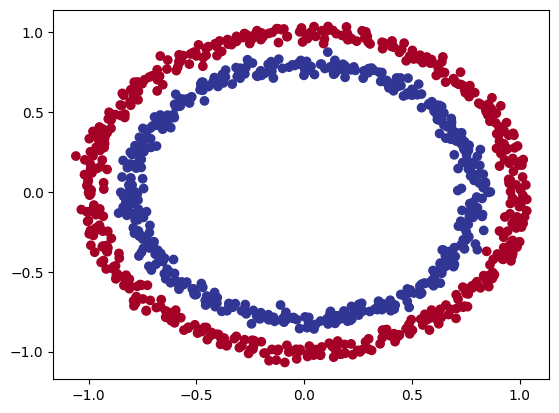

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
# Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples are we working on?
len(X), len(y)

(1000, 1000)

In [10]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
* 1. Creating a model
* 2. Compiling the model
* 3. Fitting the model
* 4. Evaluate the model

In [11]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model

model_1.fit(X, y, epochs=200, verbose=0)

# 4. Evaluate the model

model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0) # set verbose=0 to make the output print less


# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5000


[0.6943527460098267, 0.5]

## Improving the model

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5070


[0.6956356167793274, 0.5070000290870667]

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [14]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation


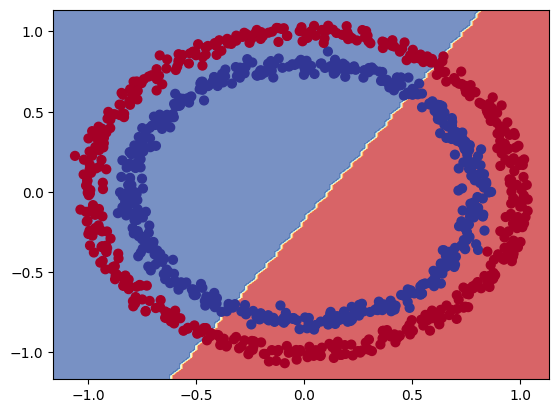

In [15]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [16]:
import numpy as np
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Generate some sample regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split the data into train and test sets
X_reg_train = X_regression[:150].reshape(-1, 1)  # Reshape to make it 2D
X_reg_test = X_regression[150:].reshape(-1, 1)
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Import Sequential and Dense from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model_3 = Sequential([
    Dense(64, input_shape=(1,), activation='relu'),  # Input shape is 1D
    Dense(1)  # Output layer for regression
])

# Compile the model
model_3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=1)


Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 259606.2188
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 234040.6719
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 212001.8750
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 190955.0000
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 171127.7344
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 152261.0625
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 135072.9375
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 119797.3203
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 106086.8906
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 93043.0391
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 81150.1328
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 70377.9141
Epoc

In [17]:
model_3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 322.3213 - mae: 322.3213
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 267.4811 - mae: 267.4811
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 261.7784 - mae: 261.7784
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 258.6967 - mae: 258.6967
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 259.9800 - mae: 259.9800
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 258.1175 - mae: 258.1175
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 254.3267 - mae: 254.3267
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 253.9310 - mae: 253.9310
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 258.7767 - mae: 258.7767
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 257.1759 - mae: 257.1759
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 6ms/step


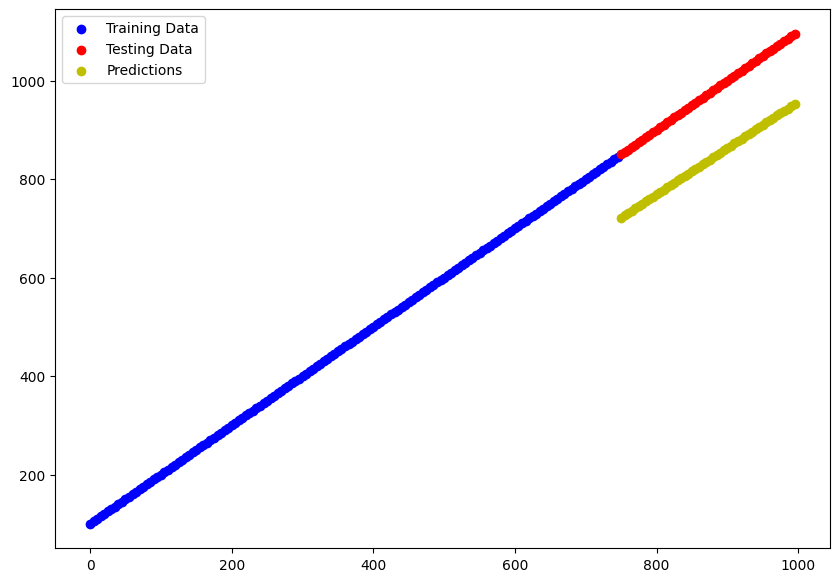

In [19]:
y_reg_preds = model_3.predict(X_reg_test)
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c='r', label='Testing Data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='y', label='Predictions')
plt.legend();

The missing piece: Non-linearity

In [20]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.5350 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4886 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4684 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3957 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3527 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2842 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1829 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0946 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0764 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.0573 - accuracy: 0.4740
Epoch 11/

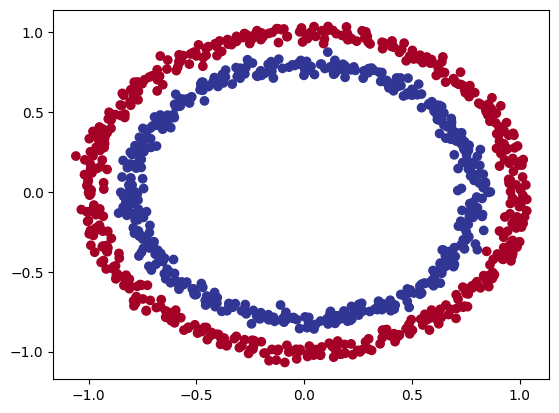

In [21]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation


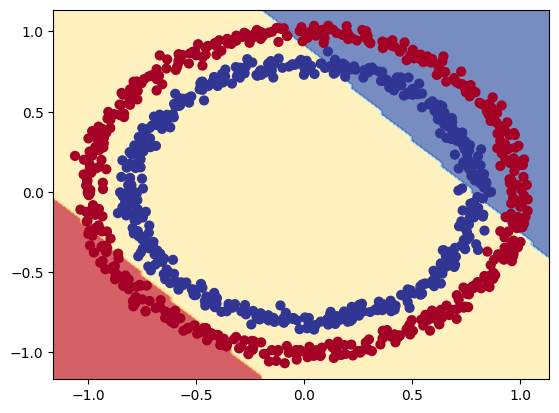

In [22]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

## Building the neural network with a non-linear function

In [23]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),

])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.4457 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3731 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2921 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2343 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1517 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1235 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9298 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.7840 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.7444 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6427 - accuracy: 0.4740
Epoch 11/

Upgrading our non-linear model with more layers

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.4947 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3943 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3697 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3335 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1903 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1168 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.0033 - accuracy: 0.4980
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.6130 - accuracy: 0.4540
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0552 - accuracy: 0.4010
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2861 - accuracy: 0.4170
Epoch 11/

In [25]:

# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4940


[0.7018716335296631, 0.49399998784065247]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation


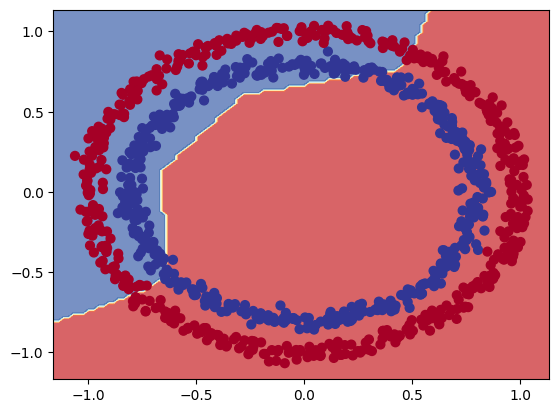

In [26]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)


In [28]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.9760


[0.30048835277557373, 0.9760000109672546]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation


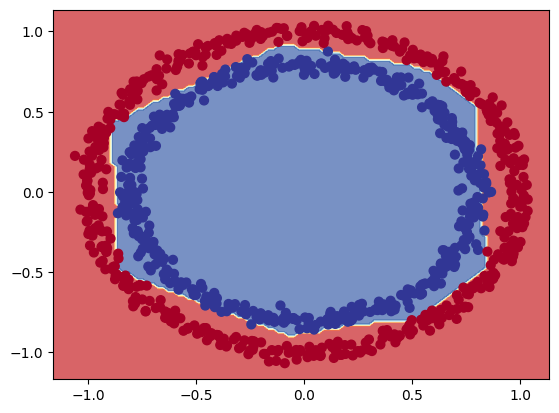

In [29]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [30]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

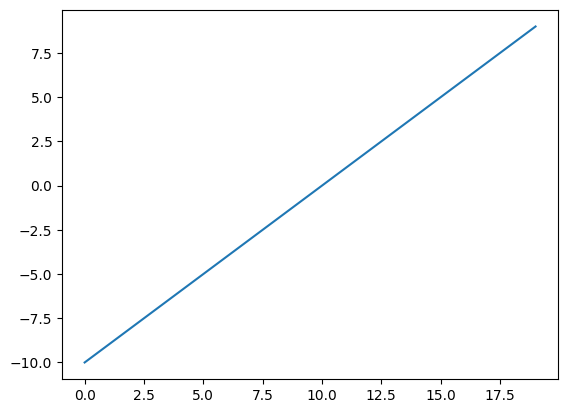

In [31]:
# Visualize our toy tensor
plt.plot(A);

In [32]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

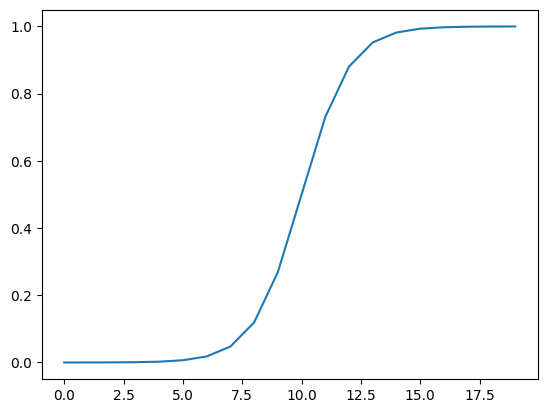

In [33]:
plt.plot(sigmoid(A));

In [34]:
# ReLU
def relu(x):
  return tf.maximum(0, x)
# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

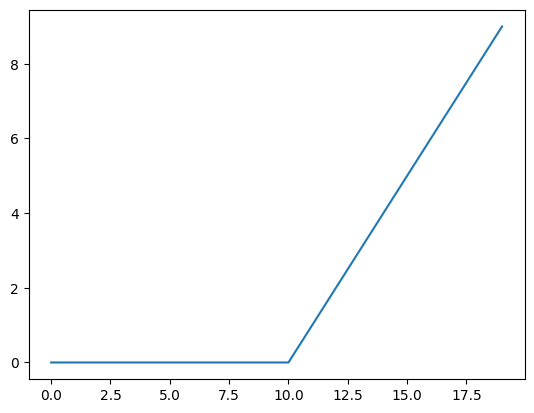

In [35]:
plt.plot(relu(A))

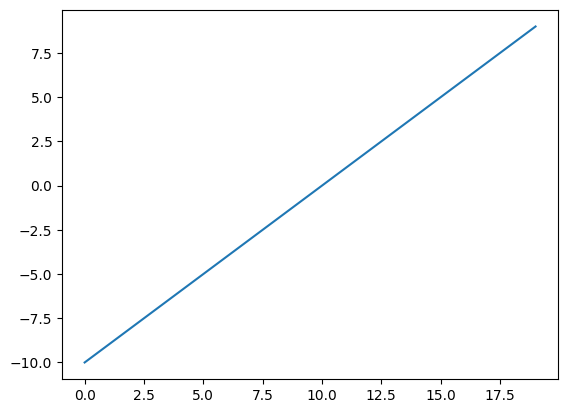

In [36]:
# Linear
plt.plot(tf.keras.activations.linear(A));

In [37]:
# How many examples are in the whole dataset?
len(X)

1000

In [38]:

# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [39]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.4825
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5275
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5350
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.5500
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.5938
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.5987
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.6112
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.6313
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.7088
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.6850
Epoch 11/25
25/25 [

In [40]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0884 - accuracy: 0.9800
Model loss on the test set: 0.08841344714164734
Model accuracy on the test set: 98.00%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation
313/313 [==============================] - 0s 1ms/step
doing binary classifcation


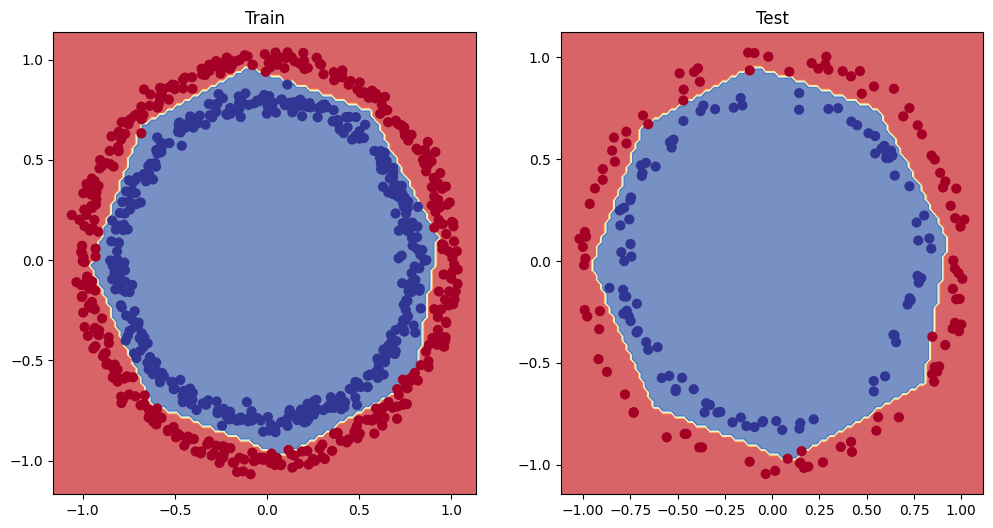

In [41]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [42]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.694004,0.48250
1,0.688933,0.52750
2,0.684189,0.53500
3,0.679005,0.55000
4,0.673282,0.59375
5,0.665555,0.59875
6,0.655744,0.61125
7,0.646468,0.63125
8,0.632922,0.70875
9,0.615073,0.68500


from matplotlib import pyplot as plt
_df_0['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='loss', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Model_8 training curves')

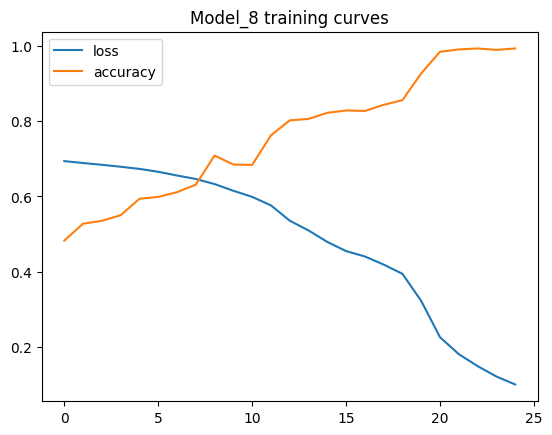

In [43]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

### Finding the best learning rate

In [44]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# FIt the the model
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 5ms/step - loss: 0.6934 - accuracy: 0.4663 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4750 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.4725 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.4762 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.4775 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.4812 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.4850 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.4850 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

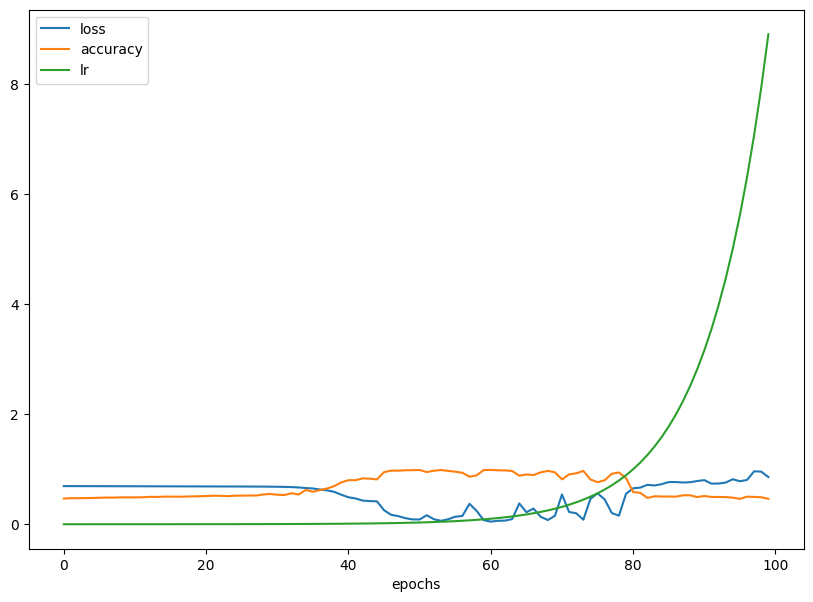

In [45]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

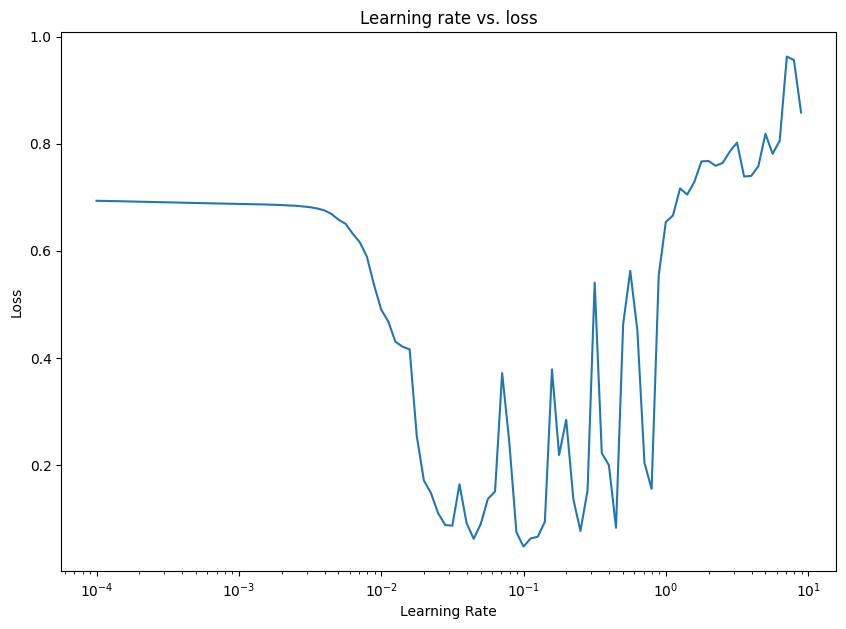

In [51]:
# plot the lr vs loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [47]:
len(lrs)

100